# Load spectra and matrices ( lsm )

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

# Filter the plot warning
warnings.filterwarnings( "ignore" )

## Wave spectra

### Jonswap Spectrum

The Jonswap spectrum can be expressed,

$$
S(\omega) = \frac{\alpha g^2}{\omega^5} \exp{\left[ -\beta \left( \frac{\omega_p}{\omega} \right) \right]} \gamma^r
$$

$$
r = \exp{\left[ -\frac{(\omega - \omega_p)^2}{ 2 \sigma^2 \omega_p^2 } \right]}
$$

where $\omega$ is the wave frequence; $\omega_p$ is the peak frequency; $\alpha$ is the intensity of the spectrum, default value = 0.0081; $\beta$ is the shape factor, default value = 1.25; $\gamma$ is the peak enhancement factor, default value = 3.3; $g$ is the acceleration due to gravity, default value = 9.81.

Usually, the input paramters can be determined by the following equation from the JONSWAP experiment,

$$
\omega_p = 22 \left( \frac{g^2}{U_w F} \right) ^ {1/3}
$$

where $U_w$ is the wind speed at 10m above the sea surface; $F$ is the distance from a lee shore.

$$
\alpha = 0.076 \left( \frac{ U_w^2}{g F} \right)^{0.22}
$$

where $\omega_p$ is the peak frequency; $U_w$ is the wind speed at 10m above the sea surface.

$$
\beta = \frac{5}{4}
$$

$$
\gamma = 3.3
$$

Function `jonswapSpectrum` implements the Jonswap sepctrum.

Reference: Hasselmann, K., Barnett, T.P., Bouws, E., Carlson, H., Cartwright, D.E., Enke, K., Ewing, J.A., Gienapp, A., Hasselmann, D.E., Kruseman, P. and Meerburg, A., 1973. Measurements of wind-wave growth and swell decay during the Joint North Sea Wave Project (JONSWAP). Ergaenzungsheft zur Deutschen Hydrographischen Zeitschrift, Reihe A.

#### Function help

In [2]:
from ffpack.lsm import jonswapSpectrum
help( jonswapSpectrum )

Help on function jonswapSpectrum in module ffpack.lsm.waveSpectra:

jonswapSpectrum(w, wp, alpha=0.0081, beta=1.25, gamma=3.3, g=9.81)
    JONSWAP (Joint North Sea Wave Project) spectra is an empirical relationship 
    that defines the distribution of energy with frequency within the ocean.
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    wp: scalar
        Peak wave frequency.
    alpha: scalar, optional
        Intensity of the Spectra.
    beta: scalar, optional
        Shape factor, fixed value 1.25.
    gamma: scalar, optional
        Peak enhancement factor.
    g: scalar, optional
        Acceleration due to gravity, a constant.
        9.81 m/s2 in SI units.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import jonswapSpectrum
    >>> w

#### Example with default values

In [3]:
jsfRange = np.linspace( 0.0, 1.2, num=121 )

In [4]:
wp = 0.51
jsfResults = [ jonswapSpectrum( w, wp ) for w in jsfRange ]

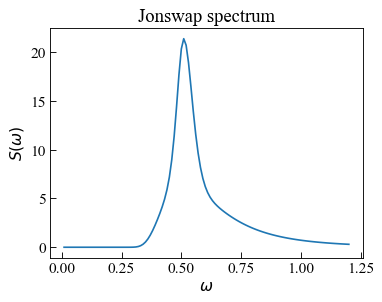

In [5]:
fig, ax = plt.subplots()

ax.plot( np.array( jsfRange ),
         np.array( jsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Jonswap spectrum" )

plt.tight_layout()
plt.show()

### Pierson Moskowitz Spectrum

The Pierson Moskowitz spectrum can be expressed,

$$
S(\omega) = \frac{\alpha g^2}{\omega^5} \exp{\left[ -\beta \left( \frac{\omega_0}{\omega} \right) \right]} \gamma^r
$$

where $\alpha$ is the intensity of the spectrum, default value = 0.0081; $\beta$ is the shape factor, default value = 0.74.

$$
\omega_0 = \frac{g}{U_w}
$$

where $g$ is the acceleration due to gravity, default value = 9.81; $U_w$ is the wind speed at 19.5m above the sea surface.

Reference: Pierson Jr, W.J. and Moskowitz, L., 1964. A proposed spectral form for fully developed wind seas based on the similarity theory of SA Kitaigorodskii. Journal of geophysical research, 69(24), pp.5181-5190.

#### Function help

In [6]:
from ffpack.lsm import piersonMoskowitzSpectrum
help( piersonMoskowitzSpectrum )

Help on function piersonMoskowitzSpectrum in module ffpack.lsm.waveSpectra:

piersonMoskowitzSpectrum(w, Uw, alpha=0.0081, beta=0.74, g=9.81)
    Pierson Moskowitz spectra is an empirical relationship 
    that defines the distribution of energy with frequency within the ocean.
    
    Parameters
    ----------
    w: scalar
        Wave frequency.
    Uw: scalar
        Wind speed at a height of 19.5m above the sea surface.
    alpha: scalar, optional
        Intensity of the Spectra.
    beta: scalar, optional
        Shape factor.
    g: scalar, optional
        Acceleration due to gravity, a constant.
        9.81 m/s2 in SI units.
    
    Returns
    -------
    rst: scalar
        The wave spectrum density value at wave frequency w.
    
    Raises
    ------
    ValueError
        If w is not a scalar.
        If wp is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import piersonMoskowitzSpectrum
    >>> w = 0.51
    >>> Uw = 20
    >>> rst = piersonMosko

#### Example with default values

In [7]:
pmsfRange = np.linspace( 0.0, 1.2, num=121 )

In [8]:
Uw = 20
pmsfResults = [ piersonMoskowitzSpectrum( w, Uw ) for w in pmsfRange ]

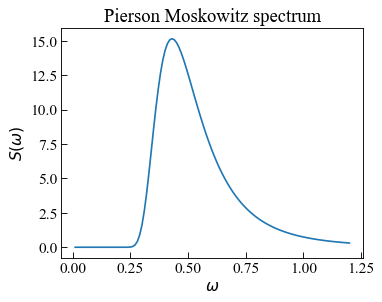

In [9]:
fig, ax = plt.subplots()

ax.plot( np.array( pmsfRange ),
         np.array( pmsfResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "$S(\omega)$" )
ax.set_xlabel( "$\omega$" )
ax.set_title( "Pierson Moskowitz spectrum" )

plt.tight_layout()
plt.show()

## Cycle counting matrix

### ASTM simple range counting matrix

#### Function help

In [10]:
from ffpack.lsm import astmSimpleRangeCountingMatrix
help( astmSimpleRangeCountingMatrix )

Help on function astmSimpleRangeCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmSimpleRangeCountingMatrix(data, resolution=0.5)
    Calculate ASTM simple range counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate range counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmSimpleRangeCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey = 

#### Example with default values

In [11]:
asrcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
asrcmMat, asrcmIndex = astmSimpleRangeCountingMatrix( asrcmData )

asrcmMat = np.array( asrcmMat )
asrcmIndex = np.array( asrcmIndex ).astype( float )

In [12]:
print( "ASTM simple range counting matrix" )
print( asrcmMat )
print()
print( "Matrix index" )
print( asrcmIndex )

ASTM simple range counting matrix
[[0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0. ]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

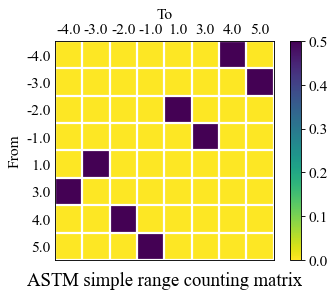

In [13]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( asrcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + asrcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + asrcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( asrcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( asrcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM simple range counting matrix", y=-0.15 )

fig.colorbar(cax)
plt.tight_layout()
plt.show()

### ASTM range pair counting matrix

#### Function help

In [14]:
from ffpack.lsm import astmRangePairCountingMatrix
help( astmRangePairCountingMatrix )

Help on function astmRangePairCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmRangePairCountingMatrix(data, resolution=0.5)
    Calculate ASTM range pair counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate range pair counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmRangePairCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey = ast

#### Example with default values

In [15]:
arpcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
arpcmMat, arpcmIndex = astmRangePairCountingMatrix( arpcmData )

arpcmMat = np.array( arpcmMat )
arpcmIndex = np.array( arpcmIndex ).astype( float )

In [16]:
print( "ASTM range pair counting matrix" )
print( arpcmMat )
print()
print( "Matrix index" )
print( arpcmIndex )

ASTM range pair counting matrix
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

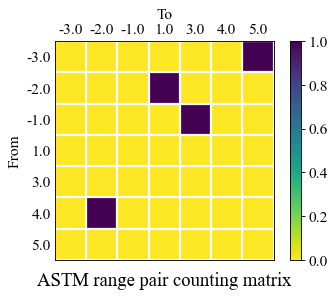

In [17]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( arpcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + arpcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + arpcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( arpcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( arpcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM range pair counting matrix", y=-0.15 )

fig.colorbar(cax)
plt.tight_layout()
plt.show()

### ASTM rainflow counting matrix

#### Function help

In [18]:
from ffpack.lsm import astmRainflowCountingMatrix
help( astmRainflowCountingMatrix )

Help on function astmRainflowCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmRainflowCountingMatrix(data, resolution=0.5)
    Calculate ASTM rainflow counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate rainflow counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
       
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmRainflowCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey = astmRai

#### Example with default values

In [19]:
arcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
arcmMat, arcmIndex = astmRainflowCountingMatrix( arcmData )

arcmMat = np.array( arcmMat )
arcmIndex = np.array( arcmIndex ).astype( float )

In [20]:
print( "ASTM rainflow counting matrix" )
print( arcmMat )
print()
print( "Matrix index" )
print( arcmIndex )

ASTM rainflow counting matrix
[[0.  0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

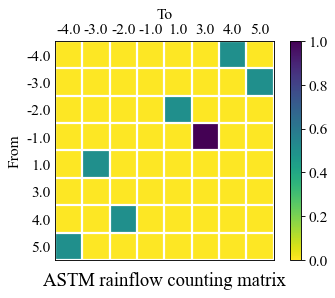

In [21]:
plt.set_cmap( "viridis_r")
fig, ax = plt.subplots()

cax = ax.matshow( arcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + arcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + arcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( arcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( arcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM rainflow counting matrix", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()

### ASTM rainflow counting matrix for repeating histories

#### Function help

In [22]:
from ffpack.lsm import astmRainflowRepeatHistoryCountingMatrix
help( astmRainflowRepeatHistoryCountingMatrix )

Help on function astmRainflowRepeatHistoryCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

astmRainflowRepeatHistoryCountingMatrix(data, resolution=0.5)
    Calculate ASTM simplified rainflow counting matrix for repeating histories.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate simplified rainflow counting matrix 
        for repeating histories.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import astmRainflowRepeatHistoryCount

#### Example with default values

In [23]:
arrhcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
arrhcmMat, arrhcmIndex = astmRainflowRepeatHistoryCountingMatrix( arrhcmData )

arrhcmMat = np.array( arrhcmMat )
arrhcmIndex = np.array( arrhcmIndex ).astype( float )

In [24]:
print( "ASTM rainflow counting matrix for repeating histories" )
print( arrhcmMat )
print()
print( "Matrix index" )
print( arrhcmIndex )

ASTM rainflow counting matrix for repeating histories
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

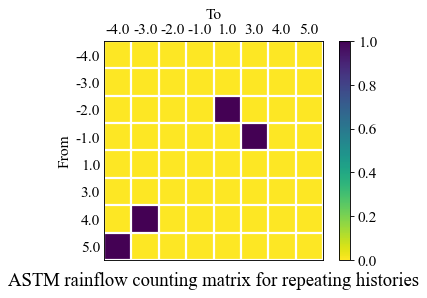

In [25]:
plt.set_cmap( "viridis_r")
fig, ax = plt.subplots()

cax = ax.matshow( arrhcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + arrhcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + arrhcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( arrhcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( arrhcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "ASTM rainflow counting matrix for repeating histories", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()

### Johannesson min max counting matrix

#### Function help

In [26]:
from ffpack.lsm import johannessonMinMaxCountingMatrix
help( johannessonMinMaxCountingMatrix )

Help on function johannessonMinMaxCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

johannessonMinMaxCountingMatrix(data, resolution=0.5)
    Calculate Johannesson minMax cycle counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate rainflow counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import johannessonMinMaxCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, m

#### Example with default values

In [27]:
jmmcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
jmmcmMat, jmmcmIndex = johannessonMinMaxCountingMatrix( jmmcmData )

jmmcmMat = np.array( jmmcmMat )
jmmcmIndex = np.array( jmmcmIndex ).astype( float )

In [28]:
print( "Rychlik rainflow counting matrix" )
print( jmmcmMat )
print()
print( "Matrix index" )
print( jmmcmIndex )

Rychlik rainflow counting matrix
[[0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-4. -3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

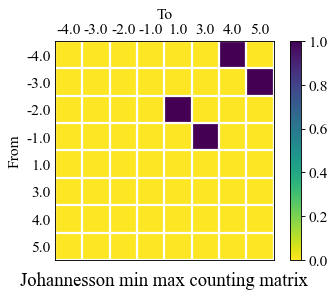

In [29]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( jmmcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + jmmcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + jmmcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( jmmcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( jmmcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "Johannesson min max counting matrix", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()

### Rychlik rainflow counting matrix

#### Function help

In [30]:
from ffpack.lsm import rychlikRainflowCountingMatrix
help( rychlikRainflowCountingMatrix )

Help on function rychlikRainflowCountingMatrix in module ffpack.lsm.cycleCountingMatrix:

rychlikRainflowCountingMatrix(data, resolution=0.5)
    Calculate Rychlik rainflow counting matrix.
    
    Parameters
    ----------
    data: 1d array
        Sequence data to calculate rainflow counting matrix.
    resolution: bool, optional
        The desired resolution to round the data points.
    
    Returns
    -------
    rst: 2d array
        A matrix contains the counting results.
    matrixIndexKey: 1d array
        A sorted array contains the index keys for the counting matrix.
    
    Raises
    ------
    ValueError
        If the data dimension is not 1.
        If the data length is less than 2.
    
    Notes
    -----
    The default round function will round half to even: 1.5, 2.5 => 2.0:
    
    Examples
    --------
    >>> from ffpack.lsm import rychlikRainflowCountingMatrix
    >>> data = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
    >>> rst, matrixIndexKey 

#### Example with default values

In [31]:
rrcmData = [ -2.0, 1.0, -3.0, 5.0, -1.0, 3.0, -4.0, 4.0, -2.0 ]
rrcmMat, rrcmIndex = rychlikRainflowCountingMatrix( rrcmData )

rrcmMat = np.array( rrcmMat )
rrcmIndex = np.array( rrcmIndex ).astype( float )

In [32]:
print( "Rychlik rainflow counting matrix" )
print( rrcmMat )
print()
print( "Matrix index" )
print( rrcmIndex )

Rychlik rainflow counting matrix
[[0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

Matrix index
[-3. -2. -1.  1.  3.  4.  5.]


<Figure size 400x320 with 0 Axes>

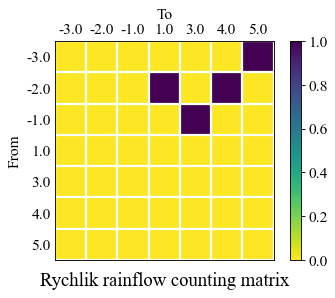

In [33]:
plt.set_cmap( "viridis_r" )
fig, ax = plt.subplots()

cax = ax.matshow( rrcmMat )

ax.tick_params( axis='x', direction="in", length=5, top=False, bottom=False )
ax.tick_params( axis='y', direction="in", length=5, left=False, right=False )
ax.tick_params( axis='x', which="minor", top=False, bottom=False )
ax.tick_params( axis='y', which="minor", left=False, right=False )
ax.set_xticklabels( [ '' ] + rrcmIndex.tolist() )
ax.set_yticklabels( [ '' ] + rrcmIndex.tolist() )
ax.set_xticks( np.arange( -.5, len( rrcmIndex ), 1 ), minor=True )
ax.set_yticks( np.arange( -.5, len( rrcmIndex ), 1 ), minor=True )
ax.grid( which="minor", color='w', linestyle='-', linewidth=2 )
ax.set_ylabel( "From" )
ax.set_xlabel( "To" )
ax.xaxis.set_label_position( "top" )
ax.set_title( "Rychlik rainflow counting matrix", y=-0.15 )

fig.colorbar( cax )
plt.tight_layout()
plt.show()